<a href="https://colab.research.google.com/github/Hyun3246/Code-Warehouse/blob/main/Polynomial_Regression%20%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)   # 지정된 범위를 일정한 개수(size)로 쪼갬
    y = x * np.sin(x ** 2) + 1
    return (x, y)

def sample(size):   # 함수 f에 노이즈 추가(실제 데이터의 역할을 함)
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

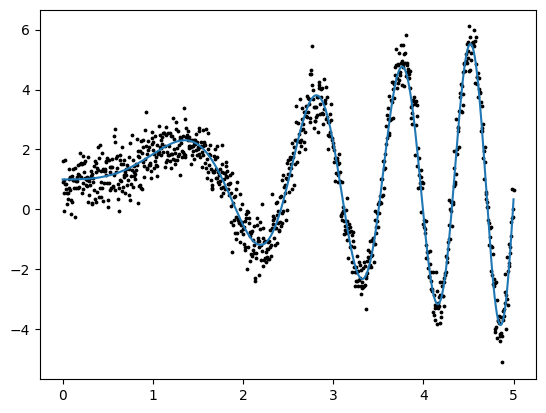

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [4]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 1), (1000, 1))

선형 회귀(1차)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

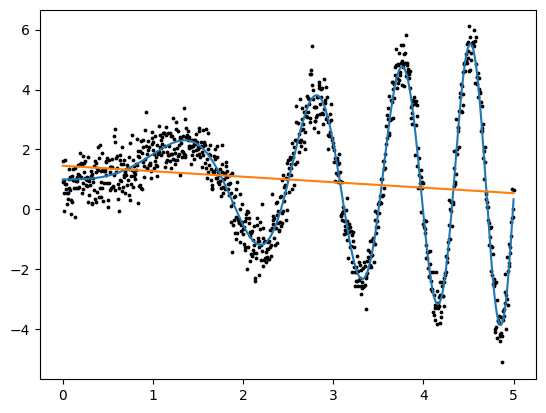

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

다항 회귀(2차)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [9]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

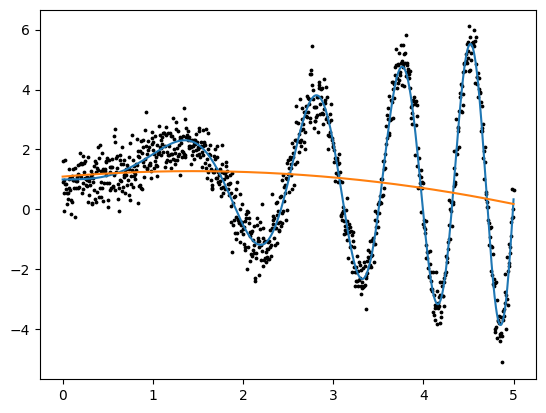

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

다항 회귀(9차)

In [11]:
poly_features = PolynomialFeatures(degree = 9)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18]])

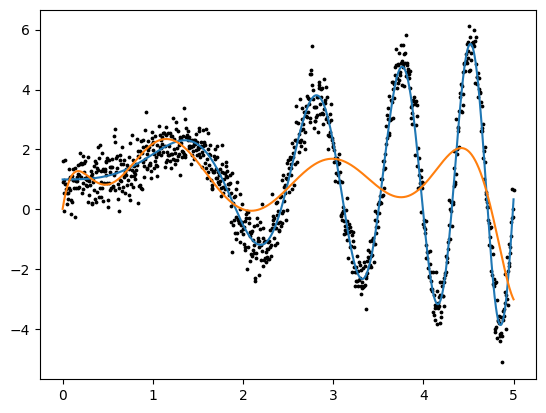

In [12]:
lr = LinearRegression()
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

다양한 차수를 실험하여 RMSE가 가장 작은 회귀 찾기

In [13]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [14]:
poly_range = list(range(10, 50))    # 실험할 차수의 리스트
rmse_lr_list = []
rmse_lasso_list = []    # 라쏘 (L1 규제화)
rmse_ridge_list = []    # 릿지 (L2 규제화)

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree = poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)

    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))

    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.062e+03, tolerance: 4.495e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.057e+03, tolerance: 4.495e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

In [15]:
import pandas as pd
from pandas import DataFrame

data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list,
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.919990,2.203913,1.942464
11,1.911209,2.210952,1.925270
12,1.634653,2.215102,1.923560
13,1.352374,2.217332,1.892731
14,1.339263,2.218597,1.667614
15,0.912445,2.219264,1.486971
16,0.709357,2.219517,1.494976
17,0.682255,2.219471,1.299942
18,0.708365,2.219217,0.883577


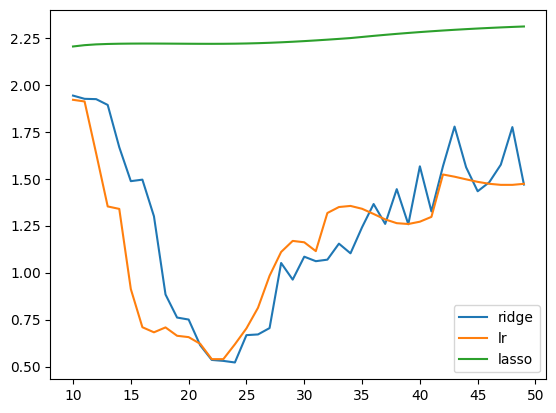

In [16]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [17]:
df.min()

,0
lr_rmse,0.539356
lasso_rmse,2.203913
ridge_rmse,0.521657


In [18]:
df["ridge_rmse"].sort_values().head()

,ridge_rmse
poly_range,
24,0.521657
23,0.530113
22,0.535230
21,0.613354
25,0.667211


가장 좋은 결과: 24차

In [19]:
poly_features = PolynomialFeatures(degree = 24)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

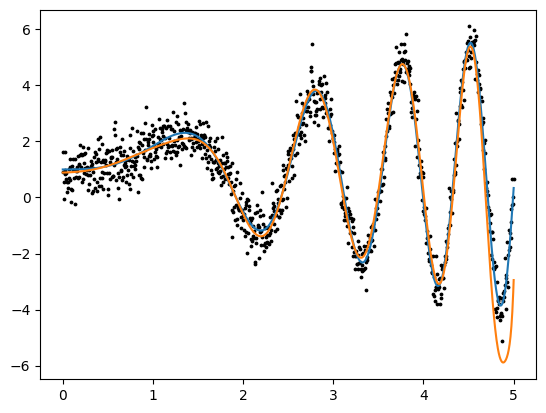

In [20]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()